# dose - deps plot programs 

### define the functions

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def MakeDoseList_z(filename,Z):

    data_origin = pd.read_csv(filename)
    
    data_dose = data_origin[data_origin['dose']>0].drop(columns = ["ix","iy","iz"])
    data_z = data_origin[data_origin['dose']>0].drop(columns = ["ix","iy","dose"])
    
    deps = np.zeros(Z)
    list_z = np.zeros(Z)
    
    for i in range(len(data_z)):
        deps[data_z.iloc[i]] += data_dose.iloc[i]
    for i in range(Z):
        list_z[i] = 0.2 * i

    return list_z,deps

In [2]:
def MakeDoseList_scorp(filename, Z, scorp_x, scorp_y):
    data_origin = pd.read_csv(filename)

    data_scorp_y = data_origin[data_origin['iy'] == scorp_y]
    data_scorp_xy = data_scorp_y[data_scorp_y['ix'] == scorp_x].drop(columns = ['ix','iy','iz'])
    
    list_z = np.zeros(Z)
    for i in range(Z):
        list_z[i] = 0.2 * i
    
    return list_z, data_scorp_xy

### Import csv data written by boxcell order

In [5]:
z,deps_beam = MakeDoseList_z("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_beam.csv",150)

In [6]:
z,deps_gun = MakeDoseList_z("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_gun.csv",150)

In [7]:
z,deps_my_gun = MakeDoseList_z("/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam.csv",150)

In [8]:
z,deps_my_beam = MakeDoseList_z("/home/yoshijun/Work/tutorial01/TestBench/data/broadbeam.csv",150)

### Import csv data written by boxcell order (x,y) = (30,30)

In [9]:
z,deps_my_beam_scorp = MakeDoseList_scorp('/home/yoshijun/Work/tutorial01/TestBench/data/broadbeam.csv',150,30,30)

In [10]:
z,deps_my_gun_scorp = MakeDoseList_scorp('/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam.csv',150,30,30)

In [11]:
z,deps_beam_scorp = MakeDoseList_scorp("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_beam.csv",150,30,30)

In [12]:
z,deps_gun_scorp = MakeDoseList_scorp("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_gun.csv",150,30,30)

### Plot deps -dose

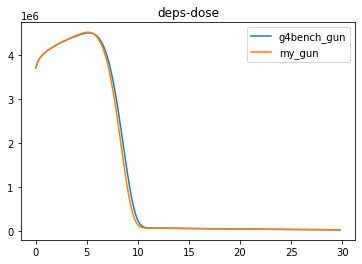

In [70]:
# plt.plot(z,deps_beam, label = "g4bench_beam")
plt.plot(z,deps_gun,  label = "g4bench_gun")
plt.plot(z,deps_my_gun, label= "my_gun")
# plt.plot(z,deps_my_beam, label = "my_beam")
plt.title("deps-dose")
# plt.xlim(5,12)
plt.legend()
plt.show()

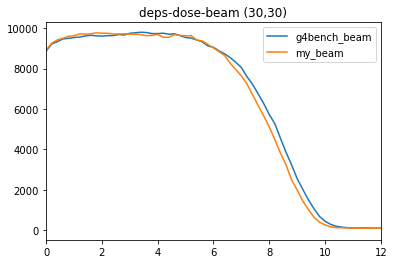

In [14]:
plt.plot(z,deps_beam_scorp, label = "g4bench_beam")
plt.plot(z,deps_my_beam_scorp, label = "my_beam")
plt.title("deps-dose-beam (30,30)")
plt.xlim(0,12)
plt.legend()
plt.show()

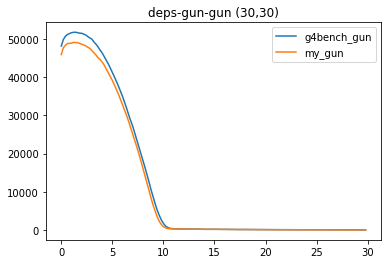

In [24]:
plt.plot(z,deps_gun_scorp,  label = "g4bench_gun")
plt.plot(z,deps_my_gun_scorp, label= "my_gun")
plt.title("deps-gun-gun (30,30)")
plt.legend()
plt.show()

## the result of gun beam shoot directly to water box cell

In [94]:
z, g4gun_direc = MakeDoseList_z("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_gun_direct.csv",150)

In [82]:
z,mygun_direc = MakeDoseList_z("/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam_direct.csv",150)

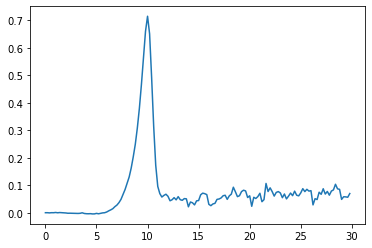

In [91]:
# plt.scatter(z, g4gun_direc)
# plt.scatter(z,mygun_direc)
plt.plot(z,(g4gun_direc-mygun_direc)/mygun_direc)
# plt.xlim(0,0.25)
plt.show()

In [5]:
z, g4gun_direc_scorp = MakeDoseList_scorp("/home/yoshijun/Work/g4bench/build/vgeo/g4bench_gun_direct.csv",150,30,30)

In [6]:
z,mygun_direc_scorp = MakeDoseList_scorp("/home/yoshijun/Work/tutorial01/TestBench/data/pencilbeam_direct.csv",150,30,30)

Text(0.5, 0, 'depth [cm]')

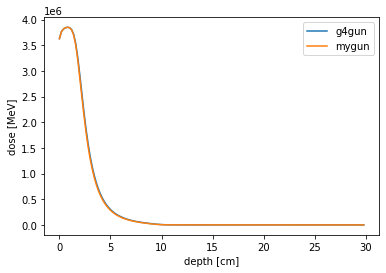

In [15]:
plt.plot(z,g4gun_direc_scorp,label = "g4gun")
plt.plot(z,mygun_direc_scorp,label = "mygun")
plt.legend()
plt.ylabel("dose [MeV]")
plt.xlabel("depth [cm]")

Text(0.5, 0, 'depth [cm]')

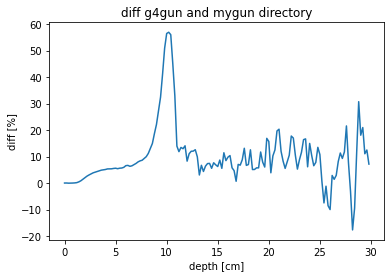

In [12]:
diff_direc = (g4gun_direc_scorp - mygun_direc_scorp)/ mygun_direc_scorp * 100
plt.plot(z,diff_direc)
plt.title("diff g4gun and mygun directory")
plt.ylabel("diff [%]")
plt.xlabel("depth [cm]")